<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Multiple-Linear-Regression-in-Statsmodels---Lab" data-toc-modified-id="Multiple-Linear-Regression-in-Statsmodels---Lab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Multiple Linear Regression in Statsmodels - Lab</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#The-Boston-Housing-Data" data-toc-modified-id="The-Boston-Housing-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>The Boston Housing Data</a></span></li><li><span><a href="#Run-a-linear-model-in-statsmodels" data-toc-modified-id="Run-a-linear-model-in-statsmodels-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Run a linear model in statsmodels</a></span></li><li><span><a href="#Run-the-same-model-in-scikit-learn" data-toc-modified-id="Run-the-same-model-in-scikit-learn-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Run the same model in scikit-learn</a></span></li></ul></li><li><span><a href="#gradient-descent" data-toc-modified-id="gradient-descent-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>gradient descent</a></span><ul class="toc-item"><li><span><a href="#Interpret-the-coefficients-for-PTRATIO,-PTRATIO,-LSTAT" data-toc-modified-id="Interpret-the-coefficients-for-PTRATIO,-PTRATIO,-LSTAT-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Interpret the coefficients for PTRATIO, PTRATIO, LSTAT</a></span></li><li><span><a href="#Predict-the-house-price-given-the-following-characteristics-(before-manipulation!!)" data-toc-modified-id="Predict-the-house-price-given-the-following-characteristics-(before-manipulation!!)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Predict the house price given the following characteristics (before manipulation!!)</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Boston Housing dataset!

## Objectives
You will be able to:
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Use standardization/normalization on features of a dataset
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Use statsmodels to fit a multiple linear regression model
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters


## The Boston Housing Data

We pre-processed the Boston Housing data again. This time, however, we did things slightly different:
- We dropped `'ZN'` and `'NOX'` completely 
- We categorized `'RAD'` in 3 bins and `'TAX'` in 4 bins
- We transformed `'RAD'` and `'TAX'` to dummy variables and dropped the first variable to eliminate multicollinearity
- We used min-max-scaling on `'B'`, `'CRIM'`, and `'DIS'` (and log transformed all of them first, except `'B'`)
- We used standardization on `'AGE'`, `'INDUS'`, `'LSTAT'`, and `'PTRATIO'` (and log transformed all of them first, except for `'AGE'`) 

In [72]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_features = boston_features.drop(['NOX', 'ZN'],axis=1)

# First, create bins for based on the values observed. 3 values will result in 2 bins
bins = [0, 6, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for based on the values observed. 4 values will result in 3 bins
bins = [0, 270, 360, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD', drop_first=True)
boston_features = boston_features.drop(['RAD','TAX'], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)

In [73]:
age = boston_features['AGE']
b = boston_features['B']
logcrim = np.log(boston_features['CRIM'])
logdis = np.log(boston_features['DIS'])
logindus = np.log(boston_features['INDUS'])
loglstat = np.log(boston_features['LSTAT'])
logptratio = np.log(boston_features['PTRATIO'])

# Min-Max scaling
boston_features['B'] = (b-min(b))/(max(b)-min(b))
boston_features['CRIM'] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
boston_features['DIS'] = (logdis-min(logdis))/(max(logdis)-min(logdis))

# Standardization
boston_features['AGE'] = (age-np.mean(age))/np.sqrt(np.var(age))
boston_features['INDUS'] = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus))
boston_features['LSTAT'] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))
boston_features['PTRATIO'] = (logptratio-np.mean(logptratio))/(np.sqrt(np.var(logptratio)))

In [74]:
boston_features.head()

,CRIM,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(6, 24]","TAX_(270, 360]","TAX_(360, 712]"
0,0.000000,-1.704344,0.0,6.575,-0.120013,0.542096,-1.443977,1.000000,-1.275260,0,1,0
1,0.153211,-0.263239,0.0,6.421,0.367166,0.623954,-0.230278,1.000000,-0.263711,0,0,0
2,0.153134,-0.263239,0.0,7.185,-0.265812,0.623954,-0.230278,0.989737,-1.627858,0,0,0
3,0.171005,-1.778965,0.0,6.998,-0.809889,0.707895,0.165279,0.994276,-2.153192,0,0,0
4,0.250315,-1.778965,0.0,7.147,-0.511180,0.707895,0.165279,1.000000,-1.162114,0,0,0


## Run a linear model in statsmodels

In [75]:
X = boston_features
y = pd.DataFrame(boston.target, columns = ['price'])

In [76]:
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [77]:
# Your code here - Check that the coefficients and intercept are the same as those from Statsmodels
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

/Users/badmin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     144.9
Date:                Wed, 03 Jun 2020   Prob (F-statistic):          5.08e-153
Time:                        15:00:51   Log-Likelihood:                -1458.2
No. Observations:                 506   AIC:                             2942.
Df Residuals:                     493   BIC:                             2997.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.6442      3.189      2.711      0.007       2.379      14.910
CRIM              -1.9538      2.115     -0.924      0.356      -6.110       2.202
INDUS             -0.8046      0.362     -2.220      0.027      -1.517      -0.093
CHAS               2.5959      0.796      3.260      0.001       1.032       4.160
RM                 2.6466      0.408      6.488      0.000       1.845       3.448
AGE                0.0794      0.352      0.226      0.821      -0.612       0.770
DIS              -10.0962      1.856     -5.439      0.000     -13.743      -6.449
PTRATIO           -1.4867      0.241     -6.160      0.000      -1.961      -1.013
B                  3.8412      0.986      3.897      0.000       1.905       5.778
LSTAT             -5.6288      0.354    -15.912      0.000      -6.324      -4.934
RAD_(6, 24]        1.3380      0.672      1.990      0.047       0.017       2.659
TAX_(270, 360]    -1.2598      0.600     -2.100      0.036      -2.438      -0.081
TAX_(360, 712]    -2.1461      0.704     -3.047      0.002      -3.530      -0.762
==============================================================================
Omnibus:                      106.730   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.101
Skew:                           0.891   Prob(JB):                     1.48e-94
Kurtosis:                       7.162   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Run the same model in scikit-learn

In [78]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
# coefficients
linreg.coef_

array([[ -1.95380233,  -0.80457549,   2.59586776,   2.64657111,
          0.07939727, -10.09618465,  -1.48666599,   3.8412139 ,
         -5.62879369,   1.33796317,  -1.25977612,  -2.14606188]])

In [9]:
# intercept
linreg.intercept_

array([8.64415614])

In [81]:
y_hat = linreg.predict(X)
y_hat

array([[33.84032815],
       [24.94777431],
       [34.55873086],
       [36.74411142],
       [31.45062281],
       [29.92386249],
       [20.72674801],
       [16.80439823],
       [10.9262629 ],
       [16.82516505],
       [16.31898605],
       [19.62450927],
       [18.15036325],
       [20.80918104],
       [19.29096764],
       [20.4359012 ],
       [22.80293934],
       [15.87191565],
       [15.99669993],
       [18.14975176],
       [11.72620792],
       [16.67154756],
       [14.3127591 ],
       [12.79931592],
       [14.68753465],
       [12.72702343],
       [14.87082149],
       [13.49755701],
       [18.3451649 ],
       [19.5029276 ],
       [10.8143721 ],
       [17.11978196],
       [ 8.47000956],
       [13.19456318],
       [12.17201747],
       [22.59003138],
       [20.49057717],
       [22.50453302],
       [21.32944371],
       [32.47870277],
       [40.87238807],
       [30.54761202],
       [27.21350619],
       [25.08872258],
       [22.4707957 ],
       [21

In [82]:
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [87]:
rss = y - y_hat
mse = (y - y_hat)**2
mse = mse.round(2)
mse

,price
0,96.83
1,11.21
2,0.02
3,11.18
4,22.56
...,...
501,2.00
502,9.17
503,44.47
504,38.59


Text(0, 0.5, 'MSE')

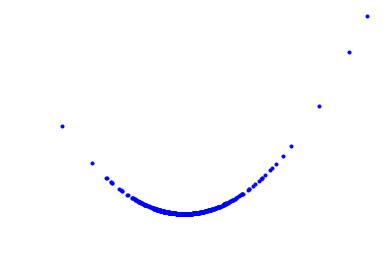

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0, 5, 100)
fig, ax = plt.subplots()
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)
ax.plot(rss, mse, '.b')

ax.set_xlabel('RSS')
ax.set_ylabel('MSE')

# gradient descent

In [26]:
boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_features = boston_features.drop(['NOX', 'ZN'],axis=1)

In [27]:
boston_features

,CRIM,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.0,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,7.07,0.0,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,7.07,0.0,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,2.18,0.0,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,2.18,0.0,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.0,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,11.93,0.0,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,11.93,0.0,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,11.93,0.0,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [29]:
X = boston_features['AGE']
y = pd.DataFrame(boston.target, columns = ['price'])

In [61]:
df = pd.concat([X, y], axis=1)
df

,AGE,price
0,65.2,24.0
1,78.9,21.6
2,61.1,34.7
3,45.8,33.4
4,54.2,36.2
...,...,...
501,69.1,22.4
502,76.7,20.6
503,91.0,23.9
504,89.3,22.0


In [64]:
x = df['AGE']
x = np.array(x).reshape(-1,1)
y = df['price']
scaler = MinMaxScaler()
scaler.fit_transform(x)

array([[0.64160659],
       [0.78269825],
       [0.59938208],
       [0.44181256],
       [0.52832132],
       [0.57466529],
       [0.65602472],
       [0.95983522],
       [1.        ],
       [0.85478888],
       [0.94129763],
       [0.82389289],
       [0.37178167],
       [0.60659114],
       [0.84037075],
       [0.55200824],
       [0.27188465],
       [0.8115345 ],
       [0.34706488],
       [0.68589083],
       [0.98043254],
       [0.88877446],
       [0.91452111],
       [1.        ],
       [0.9392379 ],
       [0.85272915],
       [0.90010299],
       [0.88465499],
       [0.9423275 ],
       [0.869207  ],
       [0.9392379 ],
       [1.        ],
       [0.8146241 ],
       [0.94850669],
       [0.96807415],
       [0.67250257],
       [0.60247168],
       [0.39752832],
       [0.28115345],
       [0.1946447 ],
       [0.13285273],
       [0.        ],
       [0.03810505],
       [0.03707518],
       [0.38208033],
       [0.31822863],
       [0.3130793 ],
       [0.850

In [66]:
df

,AGE,price
0,65.2,24.0
1,78.9,21.6
2,61.1,34.7
3,45.8,33.4
4,54.2,36.2
...,...,...
501,69.1,22.4
502,76.7,20.6
503,91.0,23.9
504,89.3,22.0


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [41]:
def regression_formula(x, slope, intercept):
    return slope * x + intercept

In [42]:
my_slope = 0
my_intercept = 0

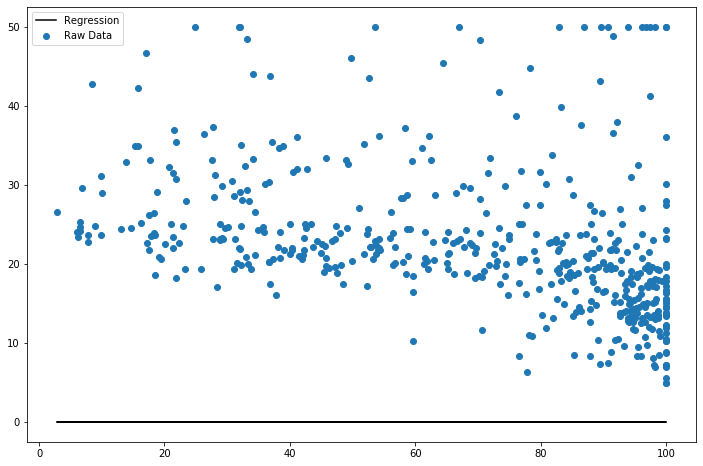

In [65]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(x, y, label = 'Raw Data')
plt.plot(x, regression_formula(x, my_slope, my_intercept), color = 'k', label = 'Regression')
plt.legend()
plt.show()

In [47]:
import math

def errors(x_values, y_values, m, b):
    y_line = (b + m*x_values)
    return (y_values - y_line)

def squared_errors(x_values, y_values, m, b):
    return np.round(errors(x_values, y_values, m, b)**2, 2)

def residual_sum_squares(x_values, y_values, m, b):
    return round(sum(squared_errors(x_values, y_values, m, b)), 2)

def root_mean_squared_error(x_values, y_values, m, b):
    return round(math.sqrt(sum(squared_errors(x_values, y_values, m, b)))/len(x_values), 2)

In [45]:
def error(intercept, slope, x, y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (slope * x[i] + intercept)) ** 2
    return totalError / len(x)

In [69]:
y=y

In [71]:
errors(x, y, 0, 0 )

Exception: Data must be 1-dimensional

In [68]:
error(0, 0, x, y)

array([592.146917])

## Interpret the coefficients for PTRATIO, PTRATIO, LSTAT

- CRIM: per capita crime rate by town
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town
- LSTAT: % lower status of the population

## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- CRIM: 0.15
- INDUS: 6.07
- CHAS: 1        
- RM:  6.1
- AGE: 33.2
- DIS: 7.6
- PTRATIO: 17
- B: 383
- LSTAT: 10.87
- RAD: 8
- TAX: 284

## Summary
Congratulations! You pre-processed the Boston Housing data using scaling and standardization. You also fitted your first multiple linear regression model on the Boston Housing data using statsmodels and scikit-learn!